# LINEAR REGRESSION

### importing libraries

In [3]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import math
import statsmodels.api as sm

In [4]:

from sklearn.linear_model import Ridge
from sklearn.metrics import f1_score as f1
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import mean_squared_error as rmse,mean_absolute_error as mae, mean_squared_log_error as rmsle

from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)



# random state

In [5]:
r=76

### importing data

In [6]:
sklearn.__version__

'0.24.1'

In [7]:
data = pd.read_csv('nyc_taxi_trip_duration-10.csv')
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id0185225,2,2016-05-24 06:43:46,2016-05-24 07:02:40,1,-73.944366,40.809509,-73.975502,40.756561,N,1134
1,id2680360,2,2016-02-03 21:30:06,2016-02-03 21:44:40,1,-73.995140,40.749779,-73.963448,40.765789,N,874
2,id1116134,2,2016-02-27 12:16:04,2016-02-27 12:20:01,1,-73.966042,40.805096,-73.961205,40.810154,N,237
3,id0134164,2,2016-06-09 11:03:12,2016-06-09 11:12:00,6,-73.975250,40.787834,-73.989952,40.775898,N,528
4,id2838892,1,2016-05-03 10:18:29,2016-05-03 10:24:33,1,-73.976608,40.739555,-73.975929,40.748917,N,364


In [8]:
target='trip_duration'         
model= lr(normalize = True)


In [9]:
lr=lr(normalize = True)

In [10]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [11]:
data=data.drop('id', axis=1)

In [12]:
data['store_and_fwd_flag'].value_counts()

N    72514
Y      418
Name: store_and_fwd_flag, dtype: int64

In [13]:
data['store_and_fwd_flag'][data['store_and_fwd_flag']=='N']=0

In [14]:
data['store_and_fwd_flag'][data['store_and_fwd_flag']=='Y']=1

In [15]:
data['store_and_fwd_flag'].head()

0    0
1    0
2    0
3    0
4    0
Name: store_and_fwd_flag, dtype: object

In [16]:
# creating an instance(date) of DatetimeIndex class 
date1 = pd.DatetimeIndex(data['pickup_datetime'])
date2 = pd.DatetimeIndex(data['dropoff_datetime'])

In [17]:
data['doy_pickup'] = date1.dayofyear


data['woy_pickup'] = date1.weekofyear


data['moy_pickup'] = date1.month


data['dow_pickup'] = date1.dayofweek

data['doy_dropof'] = date2.dayofyear


data['woy_dropof'] = date2.weekofyear


data['moy_dropof'] = date2.month


data['dow_dropof'] = date2.dayofweek





In [18]:
# checking new extracted columns using datetime
data[['pickup_datetime','doy_pickup','woy_pickup','moy_pickup','dow_pickup','doy_dropof','woy_dropof','moy_dropof','dow_dropof']].head()

,pickup_datetime,doy_pickup,woy_pickup,moy_pickup,dow_pickup,doy_dropof,woy_dropof,moy_dropof,dow_dropof
0,2016-05-24 06:43:46,145,21,5,1,145,21,5,1
1,2016-02-03 21:30:06,34,5,2,2,34,5,2,2
2,2016-02-27 12:16:04,58,8,2,5,58,8,2,5
3,2016-06-09 11:03:12,161,23,6,3,161,23,6,3
4,2016-05-03 10:18:29,124,18,5,1,124,18,5,1


In [19]:
data=data.drop(['pickup_datetime','dropoff_datetime'],axis=1)

In [20]:
data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,doy_pickup,woy_pickup,moy_pickup,dow_pickup,doy_dropof,woy_dropof,moy_dropof,dow_dropof
0,2,1,-73.944366,40.809509,-73.975502,40.756561,0,1134,145,21,5,1,145,21,5,1
1,2,1,-73.995140,40.749779,-73.963448,40.765789,0,874,34,5,2,2,34,5,2,2
2,2,1,-73.966042,40.805096,-73.961205,40.810154,0,237,58,8,2,5,58,8,2,5
3,2,6,-73.975250,40.787834,-73.989952,40.775898,0,528,161,23,6,3,161,23,6,3
4,1,1,-73.976608,40.739555,-73.975929,40.748917,0,364,124,18,5,1,124,18,5,1


In [21]:
data.shape

(72932, 16)

In [22]:
# seggregating variables into groups
latitude = ['dropoff_latitude','pickup_latitude']
longitude = ['dropoff_longitude','pickup_longitude']
trip_dur=['trip_duration']
pickup_time=['doy_pickup','woy_pickup','moy_pickup','dow_pickup']
dropof_time=['doy_dropof','woy_dropof','moy_dropof','dow_dropof']
var_group=[latitude,longitude,trip_dur,pickup_time,dropof_time]

# outliers

In [23]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>(whis_high+2)])
    outlier_low = len(data[i][data[i]<(whis_low-2)])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      return data2

True
True
True
True
True
True
True
True
True
True
True
True
True


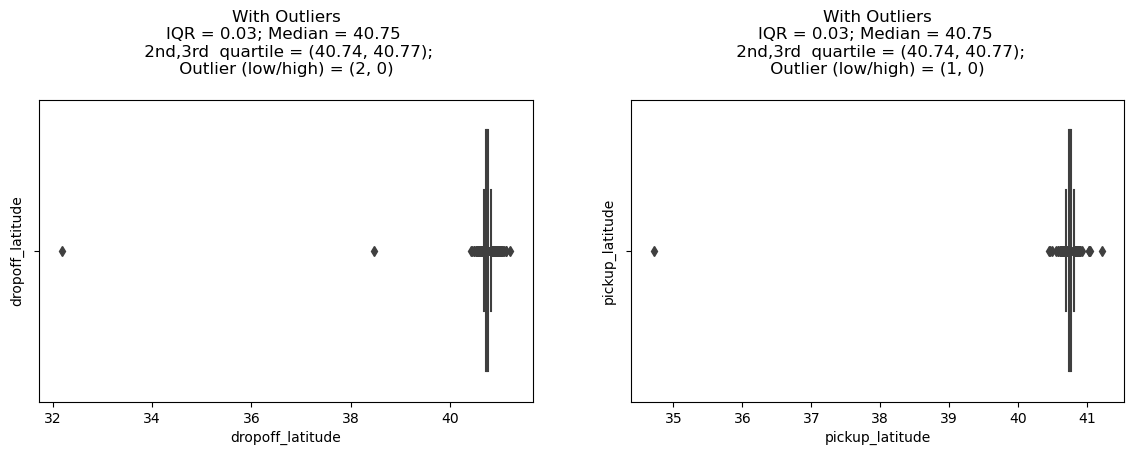

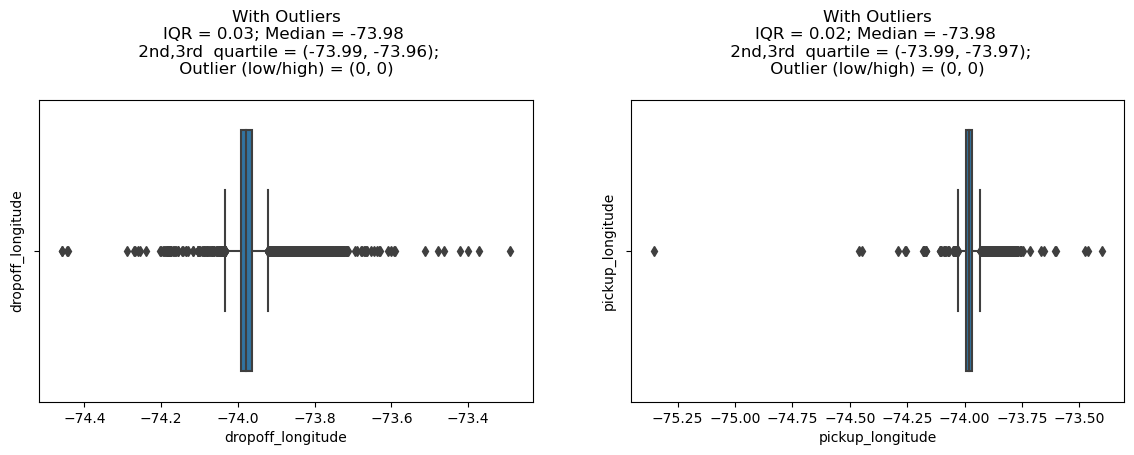

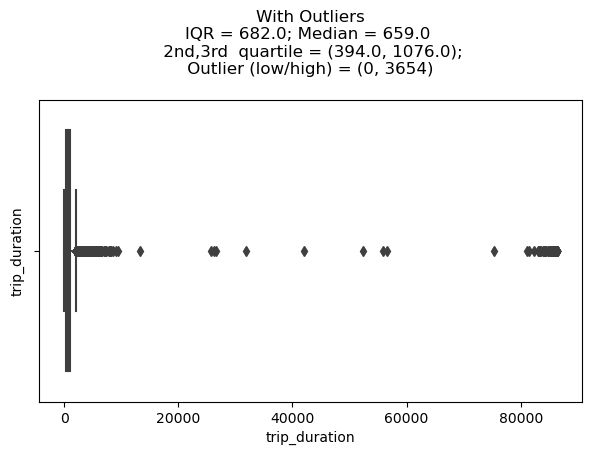

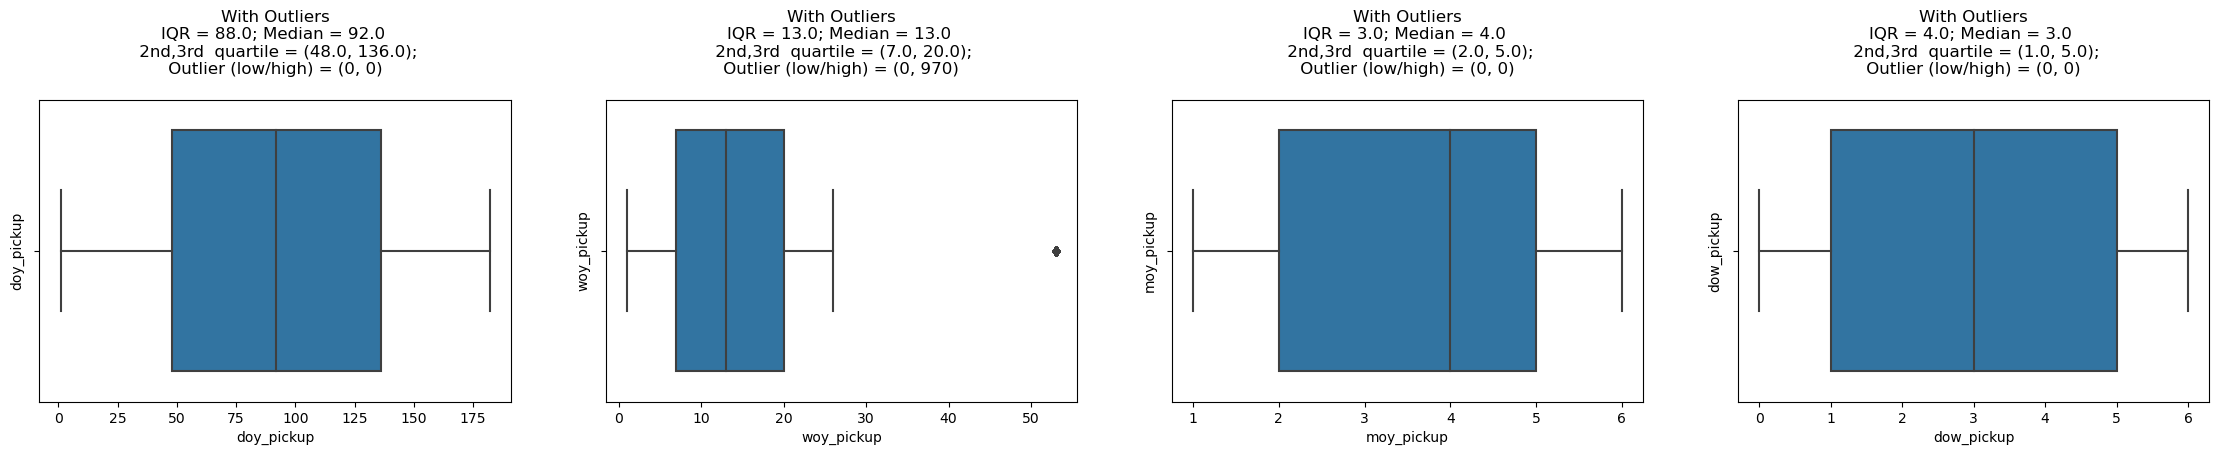

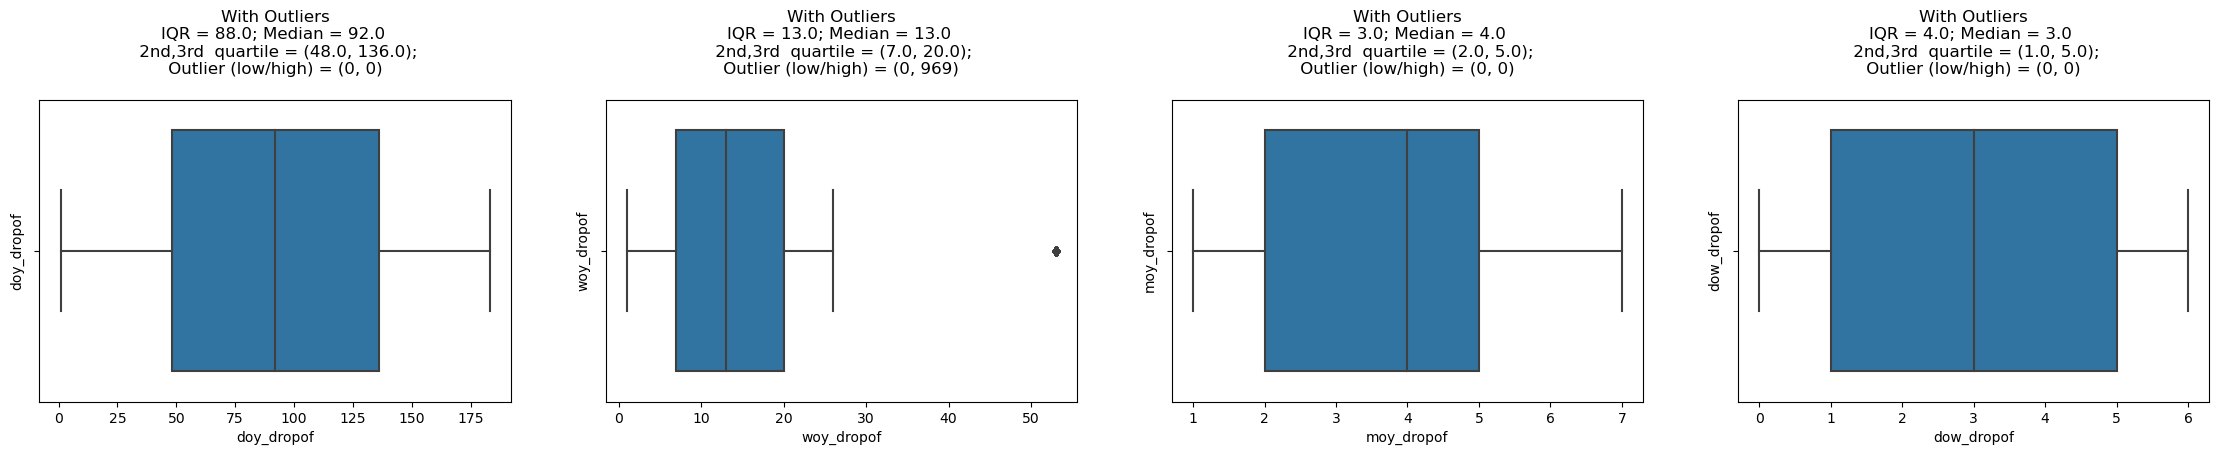

In [24]:
for i in var_group:
 UVA_outlier(data,i, include_outlier =True)

### removing outliers from data

In [25]:
 for i in data:
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    data[i][data[i]>whis_high] = whis_high+1
    data[i][data[i]<whis_low] = whis_low-1
      

True
True
True
True
True
True
True
True
True
True
True
True
True


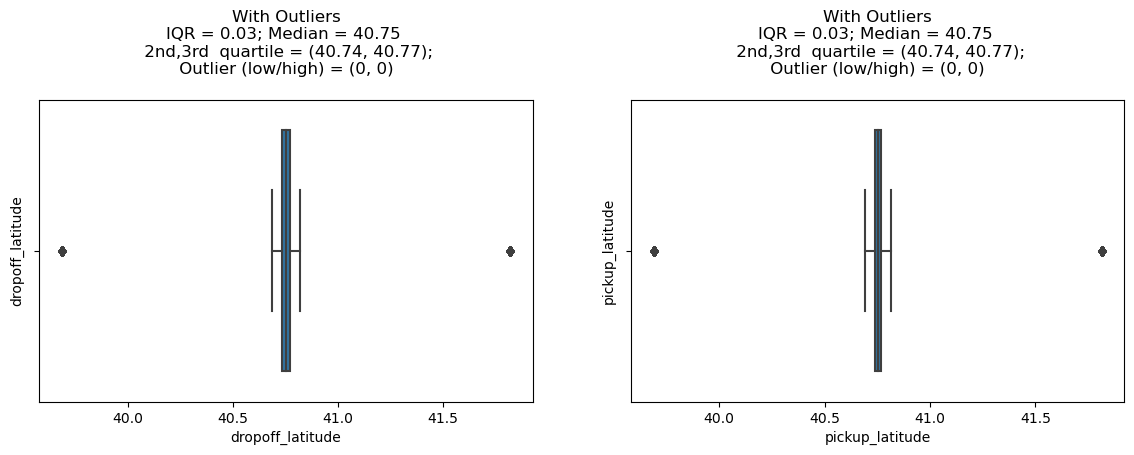

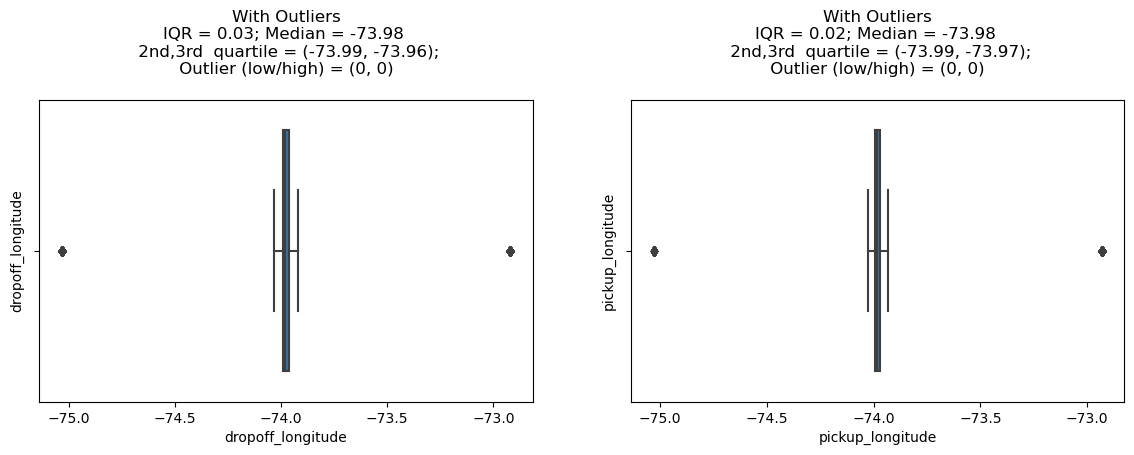

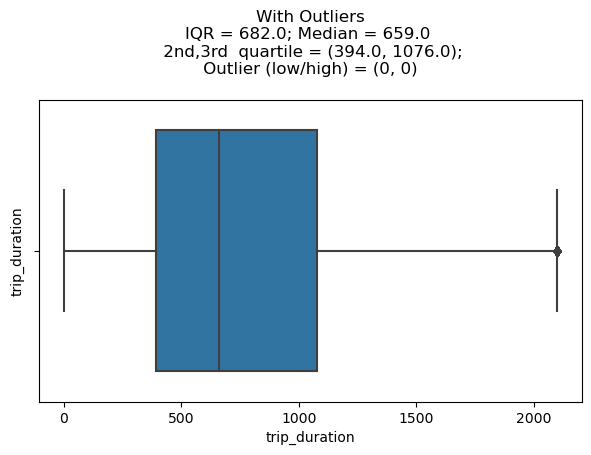

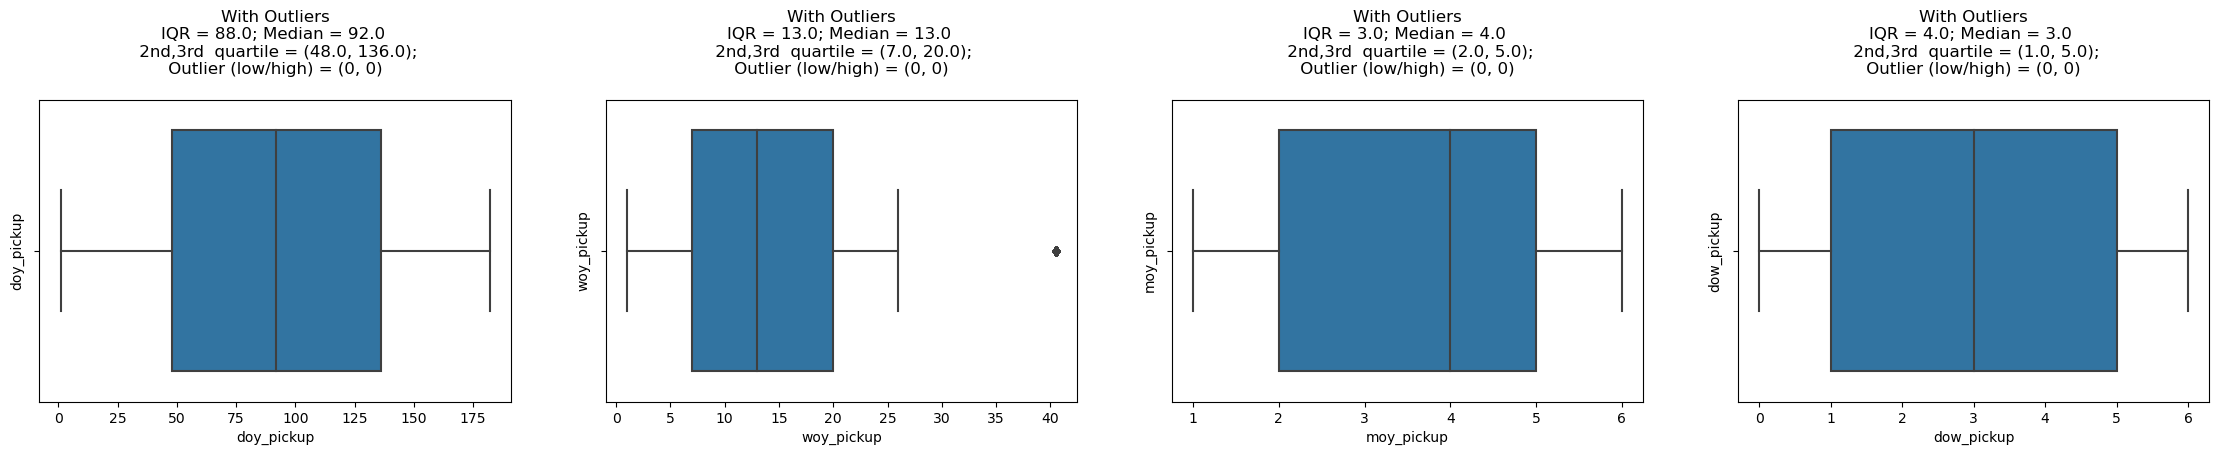

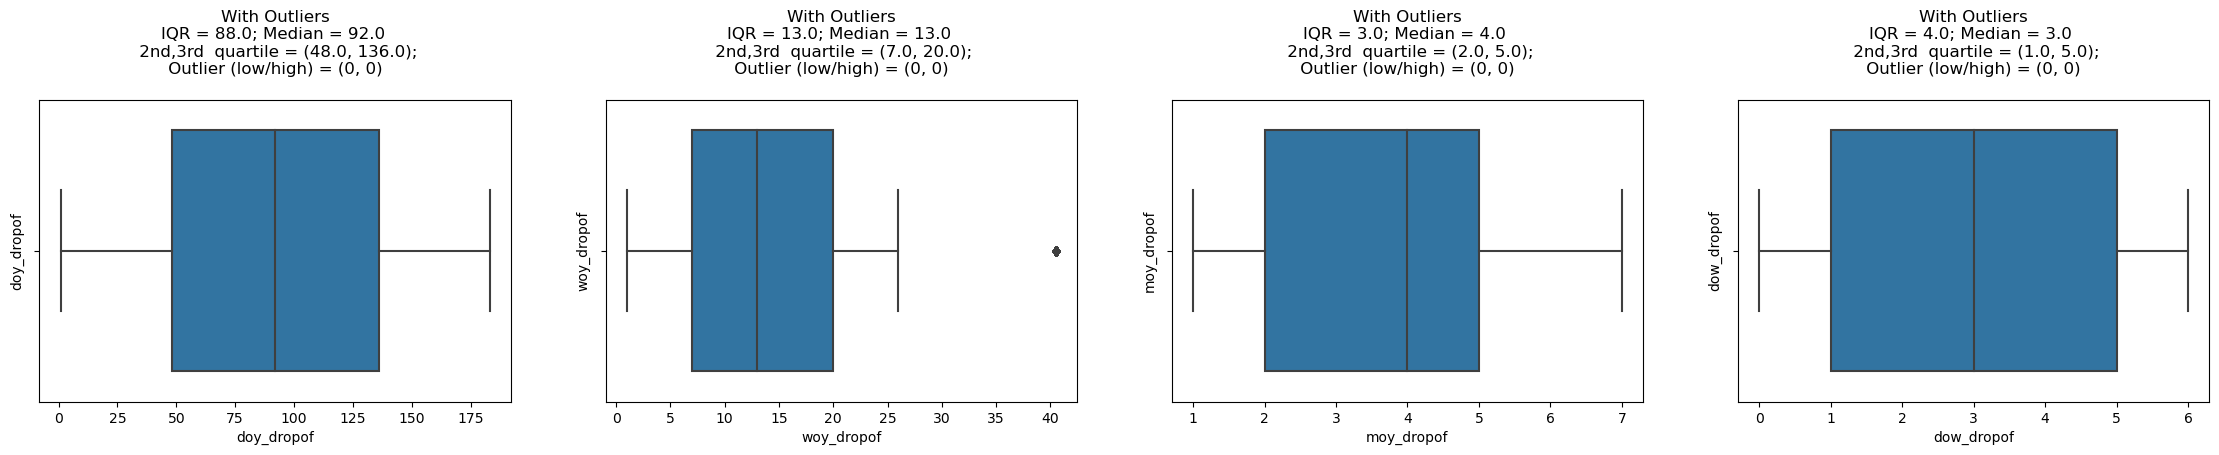

In [26]:
for i in var_group:
 UVA_outlier(data,i, include_outlier =True)

In [27]:
# converting to category
data['vendor_id'] = data['vendor_id'].astype('category')
data['passenger_count'] = data['passenger_count'].astype('category')
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')
data['moy_pickup'] = data['moy_pickup'].astype('category')
data['dow_pickup'] = data['dow_pickup'].astype('category')
data['moy_dropof'] = data['moy_dropof'].astype('category')
data['dow_dropof'] = data['dow_dropof'].astype('category')

In [28]:
data.select_dtypes(include=['float64','Int64','category']).dtypes

vendor_id             category
passenger_count       category
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag    category
trip_duration            int64
doy_pickup               int64
woy_pickup             float64
moy_pickup            category
dow_pickup            category
doy_dropof               int64
woy_dropof             float64
moy_dropof            category
dow_dropof            category
dtype: object

### always deal with missing values after dealing with outliers

In [29]:
data.isnull().sum()

vendor_id             0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
doy_pickup            0
woy_pickup            0
moy_pickup            0
dow_pickup            0
doy_dropof            0
woy_dropof            0
moy_dropof            0
dow_dropof            0
dtype: int64

In [30]:
data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,doy_pickup,woy_pickup,moy_pickup,dow_pickup,doy_dropof,woy_dropof,moy_dropof,dow_dropof
0,2,1.0,-73.944366,40.809509,-73.975502,40.756561,0.0,1134,145,21.0,5,1,145,21.0,5,1
1,2,1.0,-73.995140,40.749779,-73.963448,40.765789,0.0,874,34,5.0,2,2,34,5.0,2,2
2,2,1.0,-73.966042,40.805096,-73.961205,40.810154,0.0,237,58,8.0,2,5,58,8.0,2,5
3,2,4.5,-73.975250,40.787834,-73.989952,40.775898,0.0,528,161,23.0,6,3,161,23.0,6,3
4,1,1.0,-73.976608,40.739555,-73.975929,40.748917,0.0,364,124,18.0,5,1,124,18.0,5,1


### segegating variables

In [31]:
#seperating independent and dependent variables
x = data.drop([target], axis=1)
y = data[target]
x.shape, y.shape

((72932, 15), (72932,))

### checking assumptions of linear regression

In [32]:

train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = r)
lr.fit(train_x, train_y)
train_predict =lr.predict(train_x)
test_predict = lr.predict(test_x)

In [33]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
80,349,760.225738,-411.225738
48244,1695,677.134576,1017.865424
19911,2100,748.395530,1351.604470
57167,864,738.040407,125.959593
42325,695,760.582658,-65.582658


In [34]:
residuals.shape

(18233, 3)

Plotting residual curve (Is there constant Variance OR Homoscedastic?)

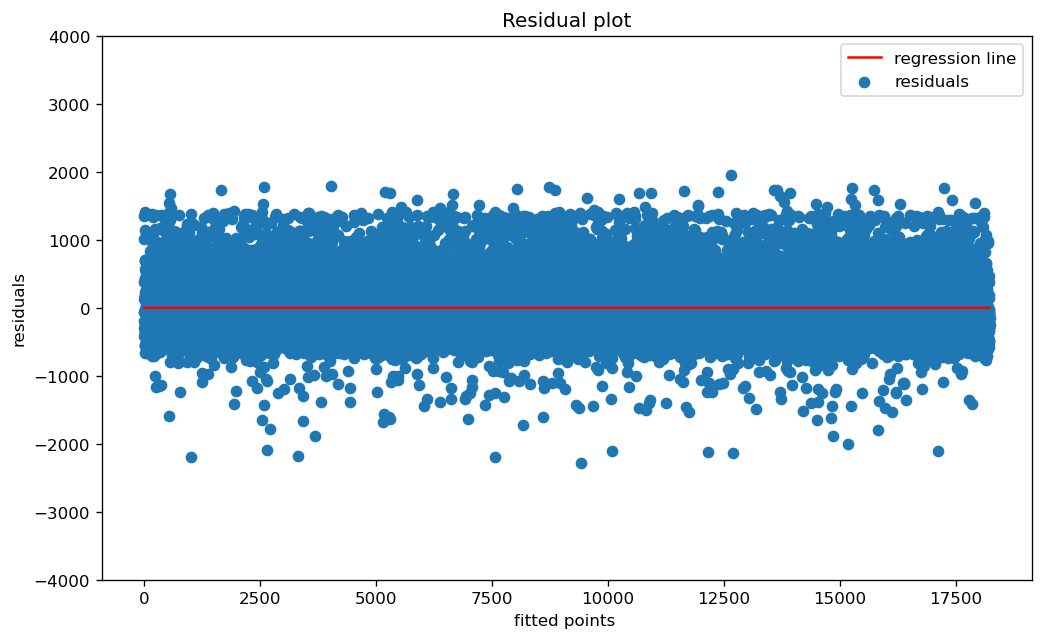

In [35]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,residuals.shape[0])
k = [0 for i in range(0,residuals.shape[0])]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-4000, 4000)
plt.legend()

The Residual plot clearly Looks Homoscedastic, i.e. the the variance of the error across the dataset is nearly constant.

Checking Distribution of Residuals

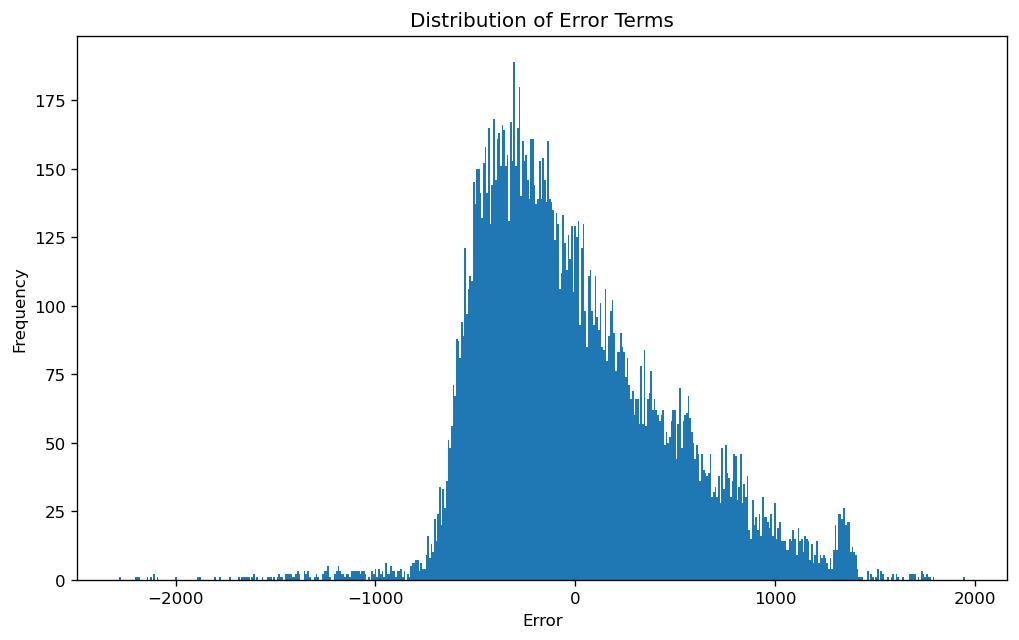

In [36]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 500)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

According to the Histogram, the distribution of error is nearly normal,but there are some unnormal behaviour on the lower end of the distribution

QQ-Plot (Is the data Normally Distributed?)

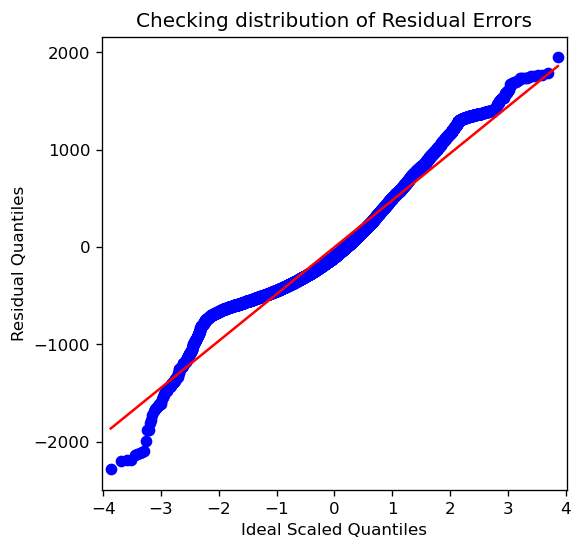

In [37]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

 the inference drawn from distribution of residuals is confirmed by qq plot.it is nearly normal lower end has some fluctuating values

Variance Inflation Factor (VIF) (Checking for multi collinearity)

In [38]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index =data.columns)
VIF

vendor_id             1.141838e+01
passenger_count       3.292788e+00
pickup_longitude      9.607716e+04
pickup_latitude       5.499280e+04
dropoff_longitude     6.980882e+04
dropoff_latitude      3.028881e+04
store_and_fwd_flag    1.013441e+00
trip_duration         3.338998e+00
doy_pickup            1.114809e+06
woy_pickup            1.119188e+04
moy_pickup            3.852436e+04
dow_pickup            2.992071e+02
doy_dropof            1.114950e+06
woy_dropof            1.120301e+04
moy_dropof            3.852555e+04
dow_dropof            2.994639e+02
dtype: float64

From this list, we clearly see that there happens to be no Independent Variable over the value of 5 (5.000e+00)(if there were any values over 5 then that would have to be removed from analysis), which means that there are no features that exhibit the Multicollinearity in the dataset. Note that VIF only works for the Continuous Variables

### splitting data

In [39]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=1/4,random_state= r)
train_x,val_x,train_y,val_y= train_test_split(train_x, train_y, test_size=1/3,random_state=r)

In [40]:
# Fitting the model

model.fit(train_x, train_y)

LinearRegression(normalize=True)

In [41]:
def rmsle(y_pred, y_test) : 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))

## rigde regularisation

higher the alpha value, more restriction on the coefficients

In [42]:
from sklearn.linear_model import Ridge
alpha_ridge = [0, 1e-8, 1e-6 ,1e-4, 1e-3,1e-2, 1, 5, 10, 20, 25]
r2adjlist,rrscorelist=[[],[]]
for i in alpha_ridge: 
 rr = Ridge(alpha=i,normalize=True)
 rr.fit(train_x, train_y)
 r2=rr.score(val_x, val_y)
 r2adj=1-((1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1))
 r2adjlist.append(r2adj)
 rrscorelist.append(r2)

In [43]:
r2adjlist

[0.15642644019257712,
 0.15643091129605569,
 0.15591667516875696,
 0.15092670242978568,
 0.15087661526183782,
 0.15127127984069988,
 0.13014260425899438,
 0.06619549108720724,
 0.04028479322481637,
 0.02251585385344379,
 0.018428297923044457]

In [44]:
c=-1
max=0
for i in r2adjlist:
 c=c+1
 if(i>=max):
    max=i
    index_alpha=c

In [45]:
print("for the alpha value = ",alpha_ridge[index_alpha]," r2adjridge value attains a maximum of ",max)

for the alpha value =  1e-08  r2adjridge value attains a maximum of  0.15643091129605569


### assigning ridge at alpha=alpha_ridge[index_alpha] as the model throughout the code

In [46]:
model=Ridge(alpha=alpha_ridge[index_alpha],normalize=True)

### selecting columns based on coefficients

In [47]:
Coefficients = pd.DataFrame({
    'Variable'    : x.columns.tolist(),
    'coefficient' : lr.coef_
})
Coefficients

,Variable,coefficient
0,vendor_id,6.732604
1,passenger_count,7.461935
2,pickup_longitude,514.387905
3,pickup_latitude,-257.058596
4,dropoff_longitude,363.701955
5,dropoff_latitude,-210.123979
6,store_and_fwd_flag,81.440396
7,doy_pickup,-415.387366
8,woy_pickup,-16.374016
9,moy_pickup,-69.009864


In [48]:
r2adjlist=[]
indexlist=[]
min=  int(Coefficients.coefficient.min())
max=  int(Coefficients.coefficient.max())
step=int((max-min)/10)
for i in range(min,max,step):
  
  sig_var = Coefficients[Coefficients.coefficient > i]
  xcoeff = x[sig_var['Variable'].values]
   
  train_xcoeff,test_xcoeff,train_ycoeff,test_ycoeff = train_test_split(xcoeff,y,test_size=1/4,random_state= r)
  train_xcoeff,val_xcoeff,train_ycoeff,val_ycoeff= train_test_split(train_xcoeff, train_ycoeff, test_size=1/3,random_state=r)
  model.fit(train_xcoeff,train_ycoeff)
  pred=model.predict(val_xcoeff)
  r2=model.score(val_xcoeff,val_ycoeff)
  r2adj=1-((1-r2)*(len(y)-1)/(len(y)-xcoeff.shape[1]-1))
  r2adjlist.append(r2adj)
  indexlist.append(i)


In [49]:
r2adjlist

[0.15059415116246122,
 0.15059415116246122,
 0.14526816799375342,
 0.13365607602849539,
 0.13411641485650228,
 0.13303870877346557,
 0.13280837537184564,
 0.13280837537184564,
 0.13280837537184564,
 0.10315445716161353,
 0.1002432267318566]

In [50]:
indexlist

[-415, -323, -231, -139, -47, 45, 137, 229, 321, 413, 505]

In [51]:
c=-1
max=0
for i in r2adjlist:
 c=c+1
 if(i>=max):
    max=i
    index_coeff=c

In [52]:
print("the columns corresponding to cofficients greater than ",indexlist[index_coeff]," when used to make model r2adjusted value attains a maximum of ",max)

the columns corresponding to cofficients greater than  -323  when used to make model r2adjusted value attains a maximum of  0.15059415116246122


assigning train val and test sets based on corresponding columns

In [53]:
sig_var = Coefficients[Coefficients.coefficient > indexlist[index_coeff]]
x = x[sig_var['Variable'].values]
   
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=1/4,random_state= r)
train_x,val_x,train_y,val_y= train_test_split(train_x, train_y, test_size=1/3,random_state=r)

## N FOLD CROSS VALIDATION

to change eval metric throughout the code make corresponding changes in the eval_metric and cv_score() and eval_score()


In [54]:
nfold=9
eval_metric=['rmsle','rmse','mae']

the function takes the ml algorithm,columns of datatable and the break value as parameter . function randomly chooses nfold sets of train and validation sets where in each fold val set is complement of train set and the union of validation sets in all folds gives the dataset itself . each fold is trained on train set and tested on validation set and gives a set of evaluation metric scores

In [55]:
def cv_score(ml_model=model, rstate = r, cols = x.columns.tolist()):
    i = 1
    cv_scores = []
    df1 = data.copy()
    df1 = data[cols]
    rmslelist,rmselist,maelist=[[],[],[]]
    indexlist=[]
    
    # 5 Fold cross validation stratified on the basis of target
    kf = StratifiedKFold(n_splits=nfold,random_state=rstate,shuffle=True)
    for df_index,test_index in kf.split(df1,y):
        
        xtr,xvl = [df1.loc[df_index],df1.loc[test_index]]
        ytr,yvl = [y.loc[df_index],y.loc[test_index]]
            
        # Define model for fitting on the training set for each fold
        model = ml_model
        model.fit(xtr, ytr)
        pred = model.predict(xvl)
         
        # Calculate scores for each fold and print
        pred_val = pred
        rmsle1 = rmsle(yvl,pred_val)
        rmse1=rmse(yvl,pred_val,squared=True)
        mae1=mae(yvl,pred_val)
        
        rmslelist.append(rmsle1)
        rmselist.append(rmse1)
        maelist.append(mae1)
        
         # Save scores
        indexlist.append(("kfold "+str((i))))
        i=i+1
        
    cv_score=pd.DataFrame([rmslelist,rmselist,maelist],index=eval_metric,columns=indexlist)
    return cv_score

In [56]:
cv_score()

,kfold 1,kfold 2,kfold 3,kfold 4,kfold 5,kfold 6,kfold 7,kfold 8,kfold 9
rmsle,0.746388,7.474232e-01,0.750921,0.749084,0.744252,0.759594,0.751336,0.753037,0.743650
rmse,234946.574457,1.907130e+06,236496.158622,234923.083207,232514.283121,240221.847121,235508.055390,236399.308401,234264.969327
mae,384.953215,3.969024e+02,383.364647,383.735690,383.580922,385.981166,383.122426,383.360125,382.708656


returns individual evaluation metric scores as a dataframe ,predefined set of columns and a model is passed as an argument


In [57]:
  def eval_score(ml_model=model, rstate = r, cols =x.columns.tolist()):
        i = 1
        indexlist=[]
    
        # Define model for fitting on the training set for each fold
        model = ml_model
        model.fit(train_x[cols],train_y)
        pred = model.predict(val_x[cols])
         
        # Calculate scores for each fold and print
        pred_val = pred
        rmsle1 = rmsle(val_y,pred_val)
        rmse1=rmse(val_y,pred_val,squared=True)
        mae1=mae(val_y,pred_val)
        
         # Save scores
        indexlist.append(("kfold "+str((i))))
        i=i+1
        eval_score=pd.DataFrame([rmsle1,rmse1,mae1],index=eval_metric,columns=['score'])
        return eval_score

In [58]:
eval_score()

,score
rmsle,0.747574
rmse,236780.668840
mae,384.009355


this is a ranking of features based on how significant they are to our analysis according to RFE

In [59]:
from sklearn.feature_selection import RFE

# Create the RFE object and rank each feature

rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(train_x, train_y)
ranking_df = pd.DataFrame()
ranking_df['Feature_name'] = x.iloc[0,].index
ranking_df['Rank'] = rfe.ranking_
ranked = ranking_df.sort_values(by=['Rank'])

In [60]:
ranked

,Feature_name,Rank
2,pickup_longitude,1
12,moy_dropof,2
8,moy_pickup,3
4,dropoff_longitude,4
3,pickup_latitude,5
5,dropoff_latitude,6
9,dow_pickup,7
13,dow_dropof,8
6,store_and_fwd_flag,9
0,vendor_id,10


In [61]:

def noof_features_metric(nrank):
  sco_featlist=[]
  for i in eval_metric:
    sco_feat=eval_score(cols = ranked['Feature_name'].iloc[:(nrank)].values.tolist()).score[i]
    sco_featlist.append(sco_feat)
  return pd.DataFrame(sco_featlist,index=eval_metric,columns=["rfe top"+str(nrank)])

calculating no of top features to be taken in the model(acc to rfe) with respect to a evaluation metric which maximises that particular evaluation metric  

In [62]:
topn_feat=0
c=-1
topfeatlist=[]
topfeatscorelist=[]
for i in eval_metric:
 c=c+1
 score=0
 min=1000000
 for j in range(1,len(x.columns.tolist())):
  score=noof_features_metric(j).iloc[c].values
  if(score<min):
    min=score
    topn_feat=j
 topfeatlist.append(topn_feat)
 topfeatscorelist.append(min)
topfeat=pd.DataFrame([topfeatlist,topfeatscorelist],columns=eval_metric,index=["rfe top feat","corresponding score"])
   

In [63]:
topfeat

,rmsle,rmse,mae
rfe top feat,7,13,13
corresponding score,[0.7463199907052781],[236796.73248218527],[384.0308809625873]


# test

with main columns with respect to each evaluation metric . columns have been filtered wrt to their coefficients ,ridge regularisation and ranking system rfe

In [64]:
predicted_wrt_evaluationmetrics=[]
rmslelist,rmselist,maelist,test_colslist, topncollist,indexlist=[[],[],[],[],[],[]]
for i in range(len(eval_metric)):
 testmetric=eval_metric[i]
 topn_feat=topfeat[testmetric][0]
 test_cols= ranked['Feature_name'].iloc[:(topn_feat)].values.tolist()
 train_x_cols,test_x_cols,train_y,test_y = train_test_split(x[test_cols],y,test_size=1/4, random_state=r)
 train_x_cols,val_x_cols,train_y,val_y= train_test_split(train_x_cols, train_y, test_size=1/3, random_state=r)
 model.fit(train_x_cols,train_y)
 test_pred_cols= model.predict(test_x_cols)

 topncollist.append(topn_feat)
 test_colslist.append(test_cols)
 rmsle1=rmsle(test_y,test_pred_cols)
 rmse1=rmse(test_y,test_pred_cols,squared=True)
 mae1=mae(test_y,test_pred_cols)
    
 rmslelist.append(rmsle1)
 rmselist.append(rmse1)
 maelist.append(mae1)
 indexlist.append(i)
 print("the rmse score has top "+str(topfeat[testmetric][0])+" features (chosen by rfe) where the evaluation metric "+str(testmetric)+" reaches the lowest score: "+str(topfeat[testmetric][1])+" compared to other combination of feature used to make the model =", rmse(val_y, test_pred_cols,squared=True),end= '\n')
 predicted_wrt_evaluationmetrics.append(test_pred_cols)

the rmse score has top 7 features (chosen by rfe) where the evaluation metric rmsle reaches the lowest score: [0.74631999] compared to other combination of feature used to make the model = 323575.34882133716
the rmse score has top 13 features (chosen by rfe) where the evaluation metric rmse reaches the lowest score: [236796.73248219] compared to other combination of feature used to make the model = 323944.30487328494
the rmse score has top 13 features (chosen by rfe) where the evaluation metric mae reaches the lowest score: [384.03088096] compared to other combination of feature used to make the model = 323944.30487328494


In [65]:
testtable=pd.DataFrame([topncollist,test_colslist, rmslelist,rmselist,maelist],index=['topn cols (rfe) which minimizes respective column metric','name of above cols','rmsle of model having above cols','rmse of model having above cols','mae of model having above cols'],columns=eval_metric)
testtable

,rmsle,rmse,mae
topn cols (rfe) which minimizes respective column metric,7,13,13
name of above cols,"[pickup_longitude, moy_dropof, moy_pickup, dro...","[pickup_longitude, moy_dropof, moy_pickup, dro...","[pickup_longitude, moy_dropof, moy_pickup, dro..."
rmsle of model having above cols,0.751619,0.752487,0.752487
rmse of model having above cols,233751.38891,233560.619797,233560.619797
mae of model having above cols,382.66252,382.495136,382.495136


In [66]:
print("the model below has been predicted by topn cols (rfe) wrt to minimizing ", eval_metric[0],end='\n')

the model below has been predicted by topn cols (rfe) wrt to minimizing  rmsle


In [67]:
predicted_wrt_evaluationmetrics[0][0:100]

array([ 763.68025136,  679.86076779,  752.56508795,  739.49160143,
        773.7014854 ,  717.15251969,  726.83643494,  717.68350526,
        773.90145687,  725.12026655,  481.37891238,  541.31911765,
       1156.27351729,  777.35619548,  756.2518118 , 1416.44355784,
        721.25060205,  744.07833922,  715.18313995,  777.73258714,
        760.72522957, 1329.31037321,  712.84246561,  709.37046623,
        697.29663868,  741.51279564, 1013.14842611,  715.55327027,
        734.43347535,  712.29226548,  691.60986557,  783.44784645,
        735.93112654,  746.42879538,  723.11167404,  779.64723905,
       1336.54126952,  799.64800019,  731.44461739,  761.84517323,
        764.4973492 ,  776.03001643,  751.84903266,  735.95220184,
        717.74295883, 1593.00495708,  761.49604148,  724.80721374,
        733.52748798,  699.87262195,  776.37099474,  739.49101534,
        673.1330192 ,  733.95247941,  719.34018216,  779.81286623,
        721.67534605,  734.22537642,  725.01223636,  771.68812

In [68]:
print("the model below has been predicted by topn cols (rfe) wrt to minimizing ", eval_metric[1],end='\n')

the model below has been predicted by topn cols (rfe) wrt to minimizing  rmse


In [69]:
predicted_wrt_evaluationmetrics[1][0:100]

array([ 763.03310981,  682.89825909,  750.97927361,  736.97285665,
        763.13256561,  720.67876873,  714.26978866,  705.39476534,
        763.89470891,  712.82944013,  482.26676893,  529.95219537,
       1155.36069138,  773.05300682,  757.95291899, 1401.22066865,
        710.70361718,  752.830236  ,  744.13620833,  804.06381834,
        747.26755685, 1314.75351268,  713.70259428,  698.08873875,
        715.87278834,  747.40165813, 1013.73439921,  718.8589093 ,
        726.7684544 ,  711.70985716,  694.58353743,  783.44882132,
        764.49498366,  748.21239616,  715.6389101 ,  779.13404605,
       1325.24640829,  805.36026459,  731.70955949,  760.86020022,
        791.86453523,  785.76492865,  743.48116271,  724.6817832 ,
        723.95458858, 1590.12482342,  768.31864964,  717.01869313,
        750.29076976,  688.58325582,  802.42728154,  728.54251921,
        681.32214815,  735.97450437,  711.20252259,  776.65646104,
        710.73358609,  726.53975841,  739.12306299,  795.40502

In [70]:
print("the model below has been predicted by topn cols (rfe) wrt to minimizing ", eval_metric[2],end='\n')

the model below has been predicted by topn cols (rfe) wrt to minimizing  mae


In [71]:
predicted_wrt_evaluationmetrics[2][0:100]

array([ 763.03310981,  682.89825909,  750.97927361,  736.97285665,
        763.13256561,  720.67876873,  714.26978866,  705.39476534,
        763.89470891,  712.82944013,  482.26676893,  529.95219537,
       1155.36069138,  773.05300682,  757.95291899, 1401.22066865,
        710.70361718,  752.830236  ,  744.13620833,  804.06381834,
        747.26755685, 1314.75351268,  713.70259428,  698.08873875,
        715.87278834,  747.40165813, 1013.73439921,  718.8589093 ,
        726.7684544 ,  711.70985716,  694.58353743,  783.44882132,
        764.49498366,  748.21239616,  715.6389101 ,  779.13404605,
       1325.24640829,  805.36026459,  731.70955949,  760.86020022,
        791.86453523,  785.76492865,  743.48116271,  724.6817832 ,
        723.95458858, 1590.12482342,  768.31864964,  717.01869313,
        750.29076976,  688.58325582,  802.42728154,  728.54251921,
        681.32214815,  735.97450437,  711.20252259,  776.65646104,
        710.73358609,  726.53975841,  739.12306299,  795.40502

## all columns

In [72]:
model.fit(train_x,train_y)
test_pred = model.predict(test_x)


In [73]:
rmsle(test_y,test_pred)

0.7524510782853355

In [74]:
rmse(test_y,test_pred,squared=True)

233544.95073257352

In [75]:
mae(test_y,test_pred)

382.48578249881007